# Modellieren echter Daten

Es soll die Reatkion :

butanal <--> butyroin <--> buteraldehyd 

modelliert werden

Der Gesamtverlauf sieht dabei so aus:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"4,5-ODO Upscaling.xlsx")
print(df.head())

time = df["T [min]"]
butanal = df["Butanal"]
butyroin = df["butyroin"]
octandiol = df["4,5-octanediol"]

fig,ax = plt.subplots()

ax.plot(time, butanal, label = "butanal")
ax.plot(time, butyroin, label = "butyroin")
ax.plot(time, octandiol, label = "octandiol")
plt.legend()
plt.show()



   T [min]     Butanal   butyroin  4,5-octanediol
0        0  235.403070   0.000000             0.0
1       15  136.667003  35.135764             0.0
2       30   78.775571  59.773672             0.0
3       60   39.501736  80.610846             0.0
4      140   15.373700  85.416647             0.0


<Figure size 640x480 with 1 Axes>

# Schritt 1: Modellieren des Substratverlaufs

[[240.        ]
 [115.39234415]
 [ 75.96836553]
 [ 45.15540862]
 [ 21.76700349]
 [ 19.85514362]
 [ 18.25713069]
 [ 15.52533465]
 [  7.68686215]
 [  3.33601707]]


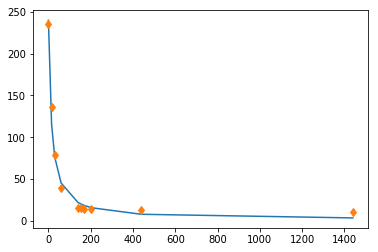

In [2]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]
concentration_A0 = 240

def substrate_curve(A, t, k1, k2):
    dAdt = -k1*A**2 + k2*((concentration_A0-A)*0.5)
    return dAdt

solver_substrat = odeint(substrate_curve, concentration_A0, time, args=(0.0003,0.00002))
print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat)
ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()



# Einbinden des Ersten Produkts

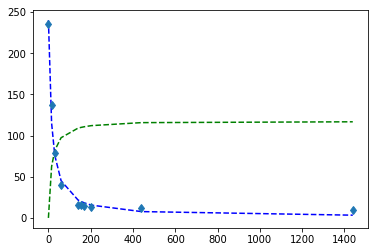

In [7]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]

inital_conditions = [240,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2):
    A = init_cond[0]
    B = init_cond[1]

    dAdt = -k1*A**2 + k2*B
    dBdt = k1*A**20.5 -k2*B
    dZdt = np.array([dAdt,dBdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.00002))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()


# Einbinden des Zweiten produkts

0.0
0.00012206683773180562
0.00012206658930715535
0.0002441331786153216
0.0002441329301914294
0.05406110481804969
0.054061121088224175
0.10782981039025127
0.10782984287201858
0.16155033072698383
0.1615503631505453
0.4538246727338073
0.4538250642702745
0.3604075633445671
0.3604077465181507
0.2013747239434966
0.20137473135864106
0.24117263941227504
0.24117263196232203
0.28094408985543584
0.28094408984124253
0.32068913133588595
0.32068913132130633
0.4001000703252611
0.40010007025546024
0.4794056587065991
0.47940565874223645
0.5586061061558214
0.5586061061915184
0.6377016214696448
0.6377016214703289
0.7166924128882391
0.7166924128889284
1.5008859499334117
1.5008859517873532
2.274832205863942
2.2748322094487365
3.0387306618643652
3.038730654604915
3.792775614812949
3.7927756111425235
4.53715642594115
4.537156423683534
5.272057618566394
5.272057616411145
7.376163895853342
7.376163796011446
9.404448353991786
9.40444801561515
11.360933840537564
11.360934225394699
13.249366162936624
13.24936654

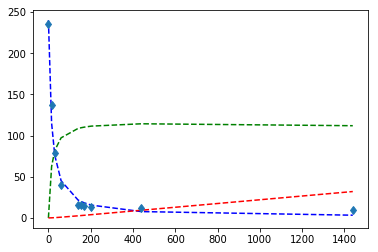

In [22]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]

inital_conditions = [240,0,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2, k3, k4):
    A = init_cond[0]
    B = init_cond[1]
    C= init_cond[2]

    dAdt = -k1*A**2 + k2*B
    dBdt = k1*A**2*0.5 - (k2+k3)*B
    dCdt = k4*B
    print(B)

    dZdt = np.array([dAdt,dBdt, dCdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.00002, 0.00003, 0.0002))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")
ax.plot(time,solver_substrat[:,2], linestyle="--", color="red")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()